# padding - all envs

## plot mean sum of total reward with variance (or StdDev)

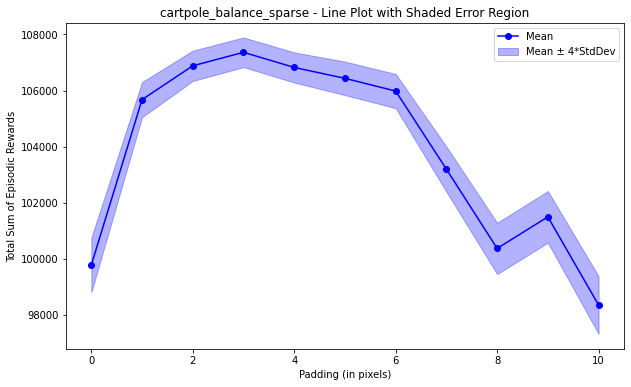

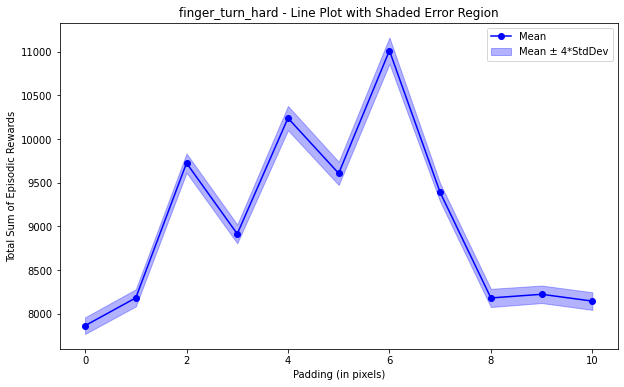

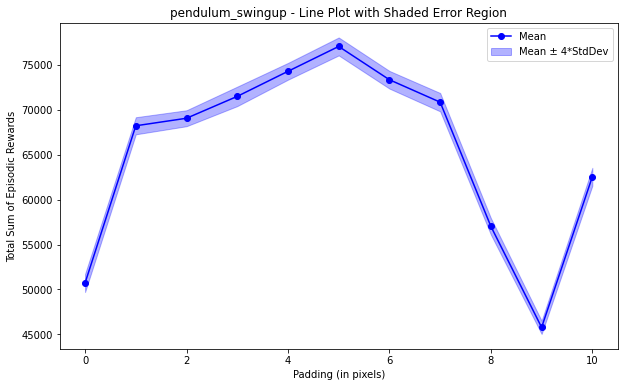

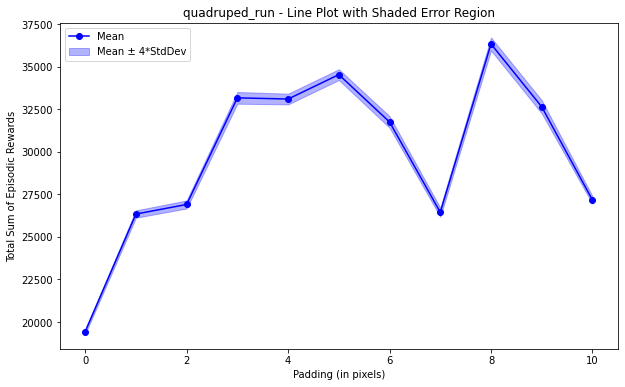

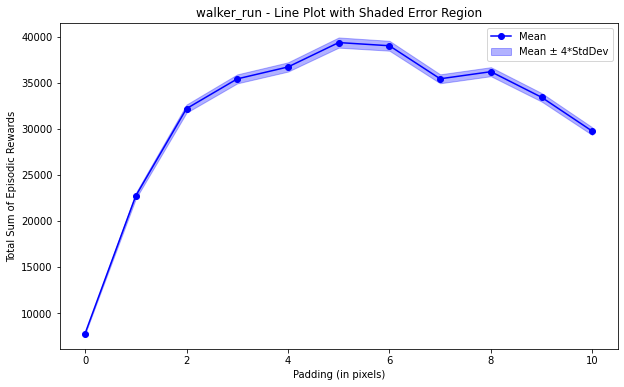

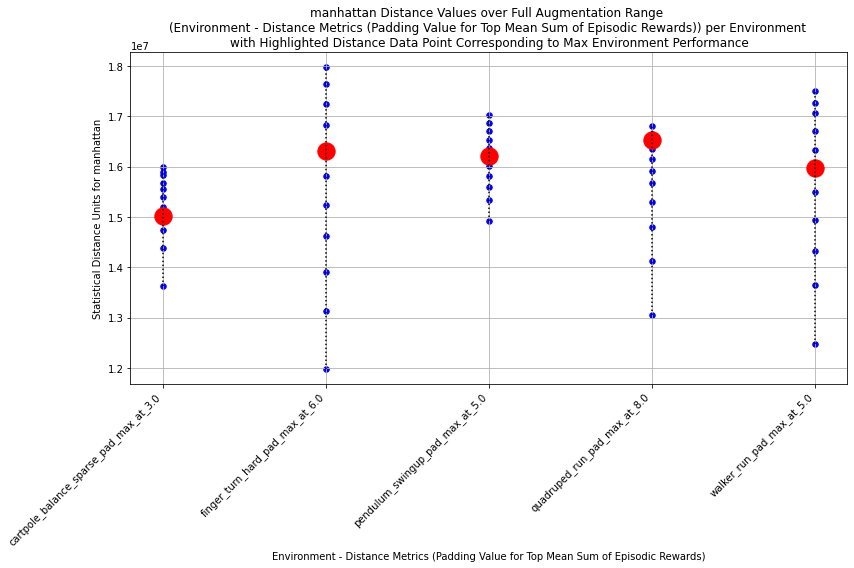

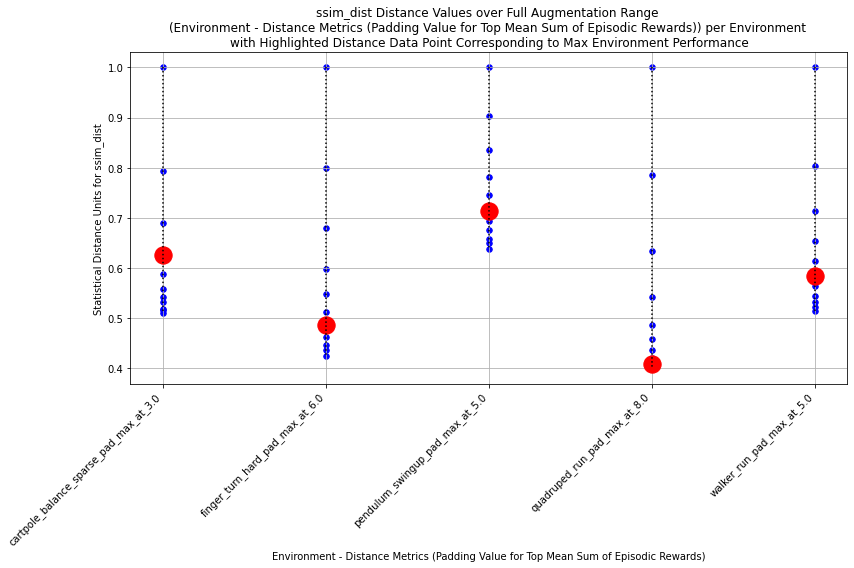

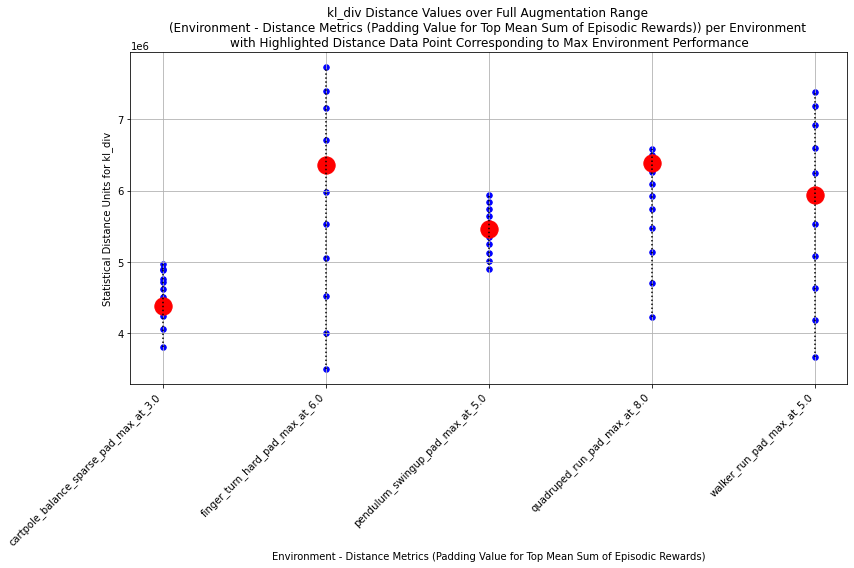

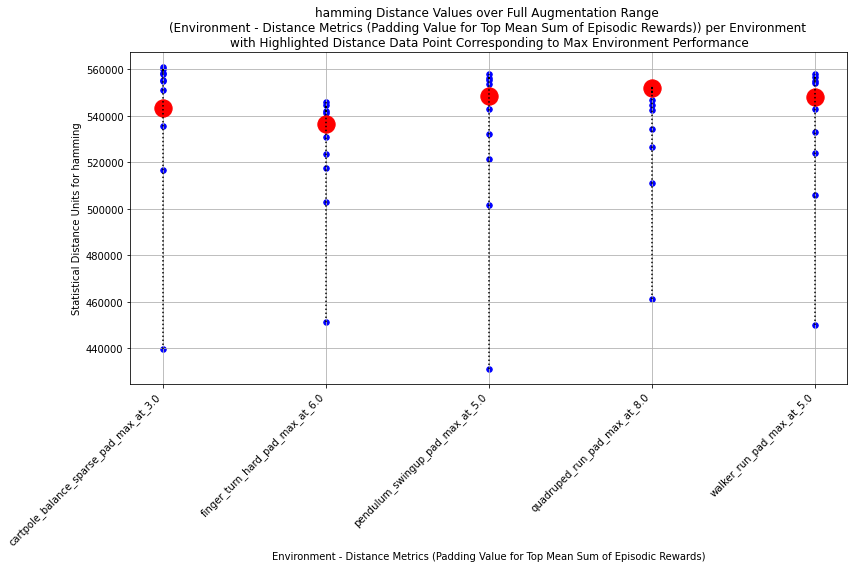

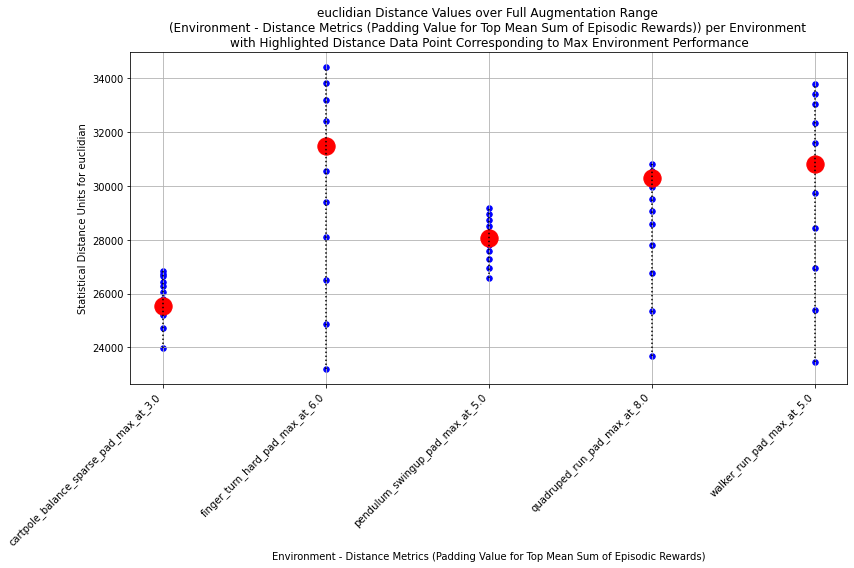

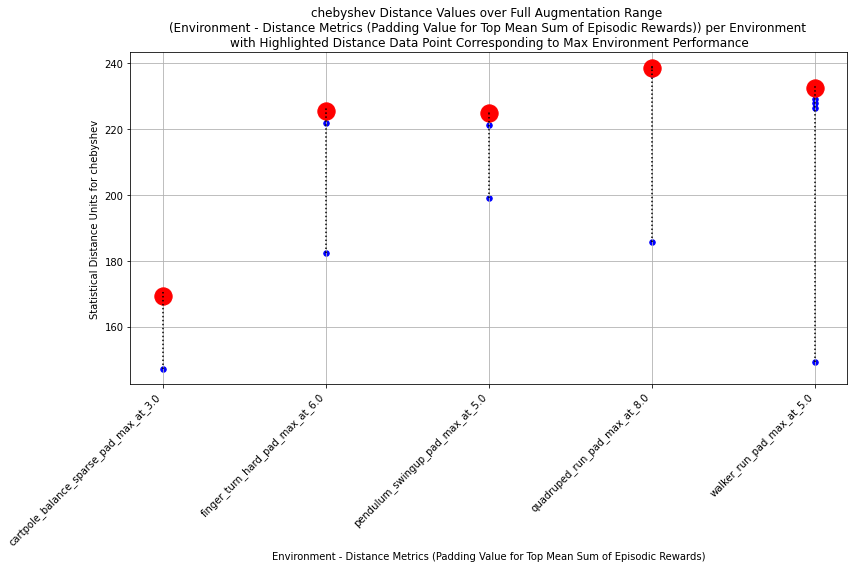

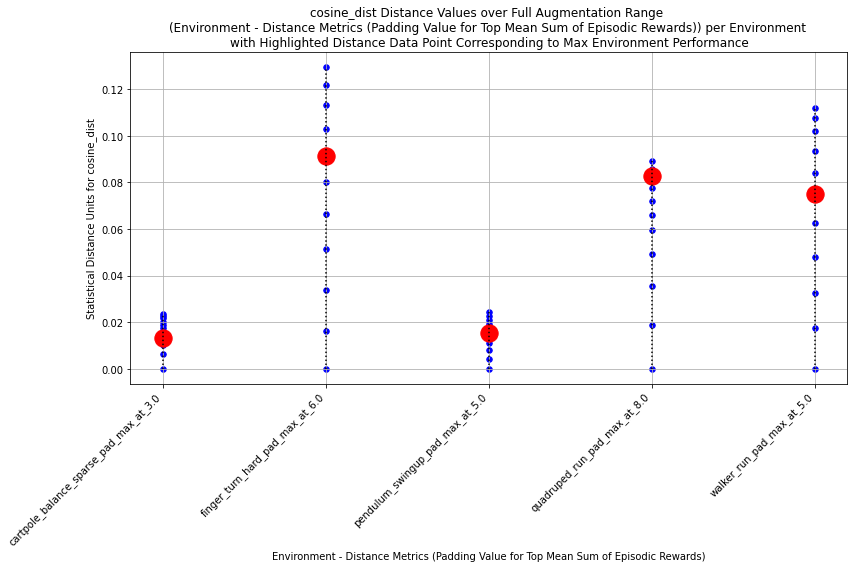

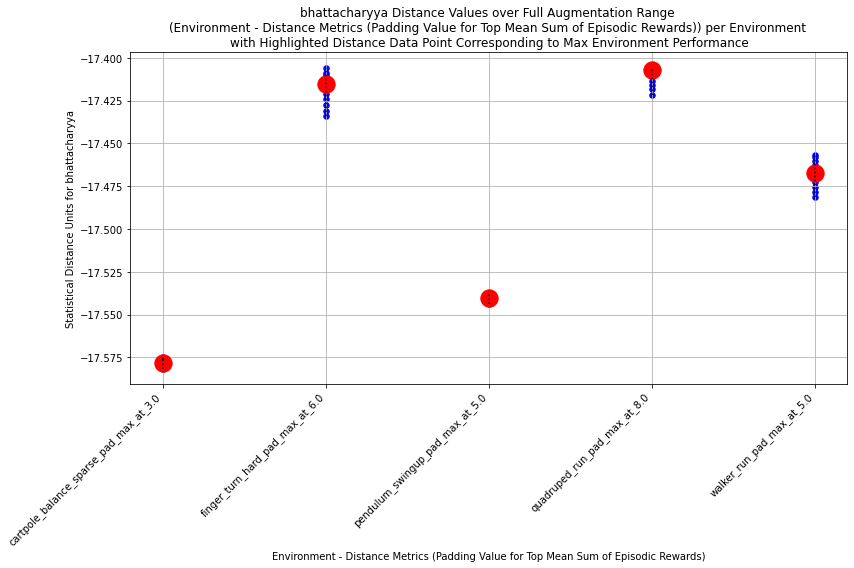

In [1]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'pad'
EXP_NAME = 'shift'
LIST_VALS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Padding (in pixels)'
USE_VARIANCE = False
TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}

plot_performance = True
plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
    'cartpole_balance_sparse',
    'finger_turn_hard',
    'pendulum_swingup',
    'quadruped_run',
#     'reacher_hard',
    'walker_run'
]


for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)
    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)


    
XLABEL_STATS = 'Environment - Distance Metrics (Padding Value for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists)

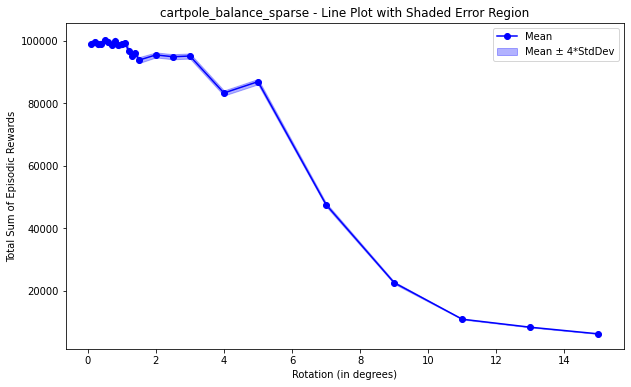

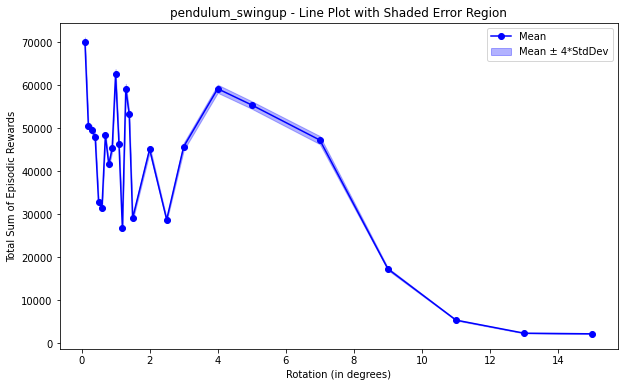

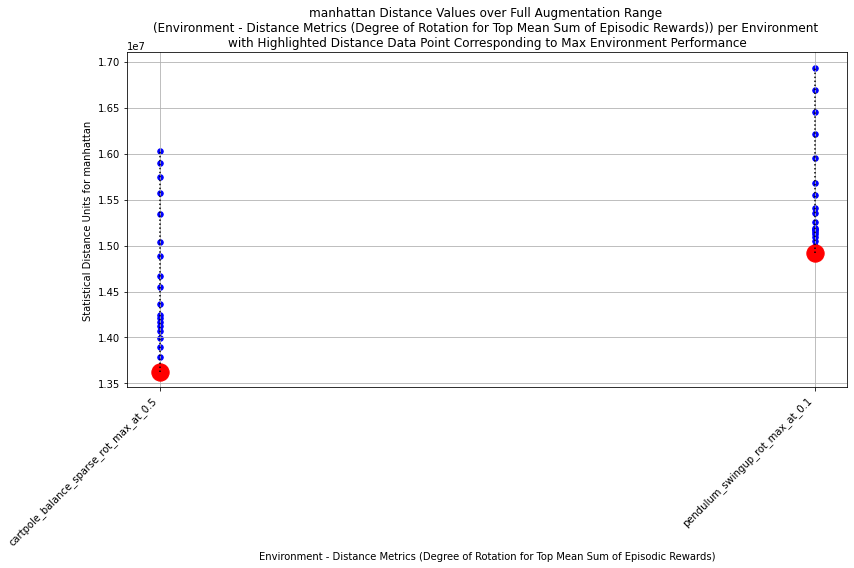

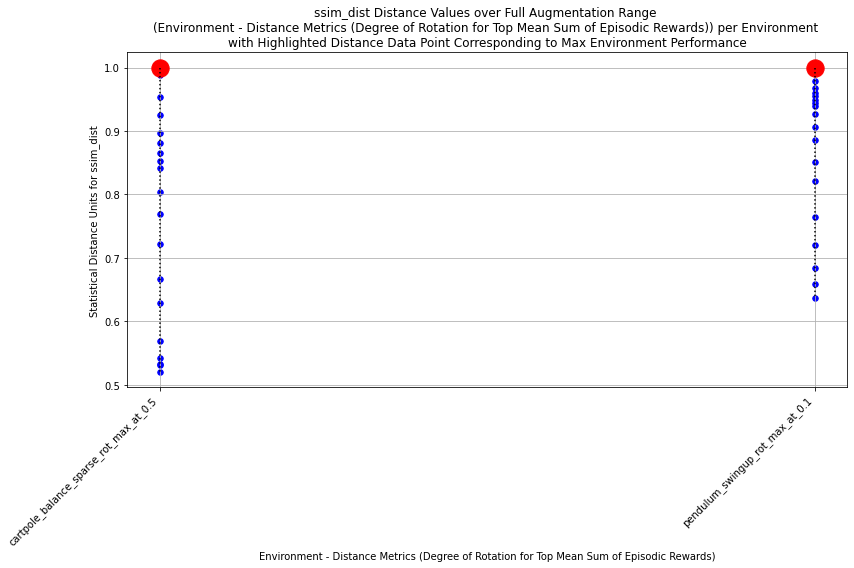

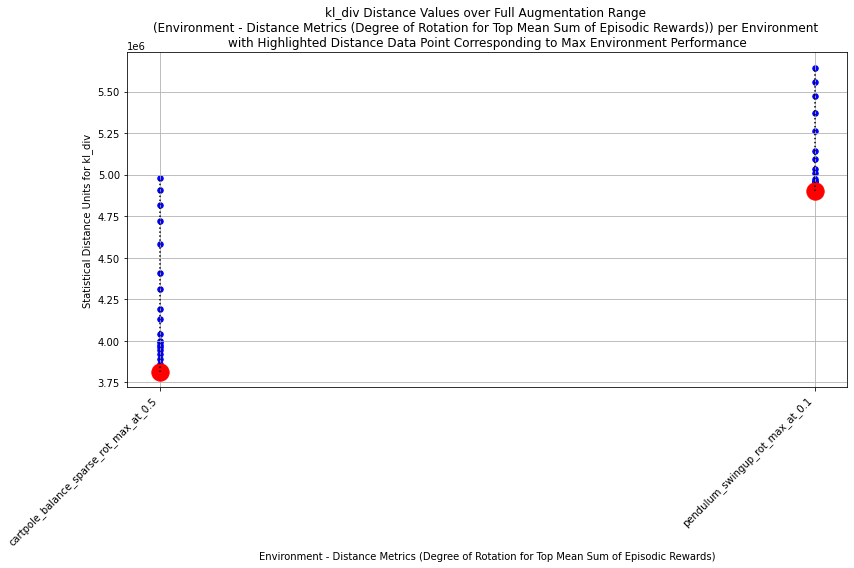

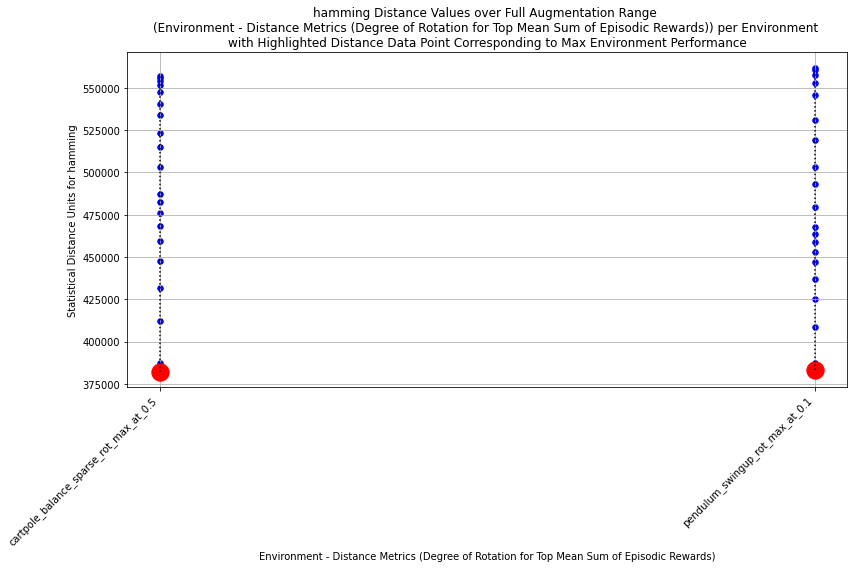

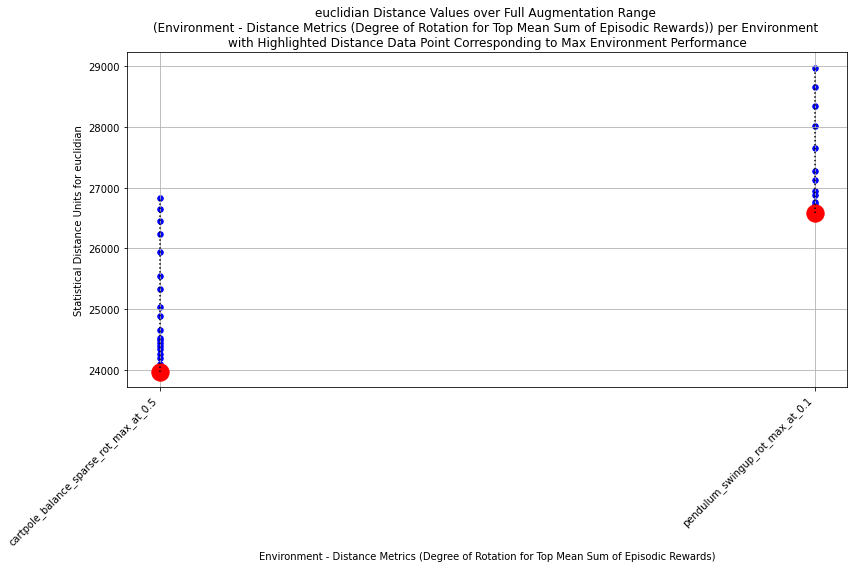

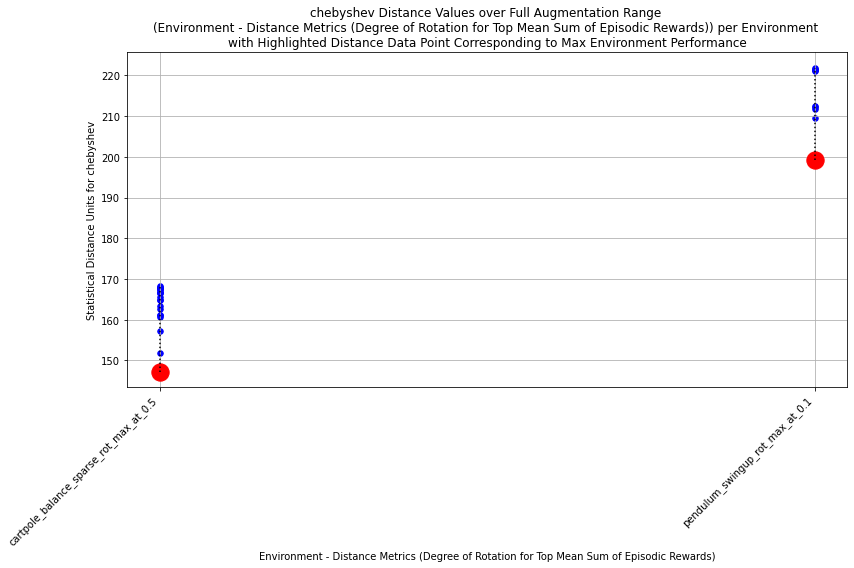

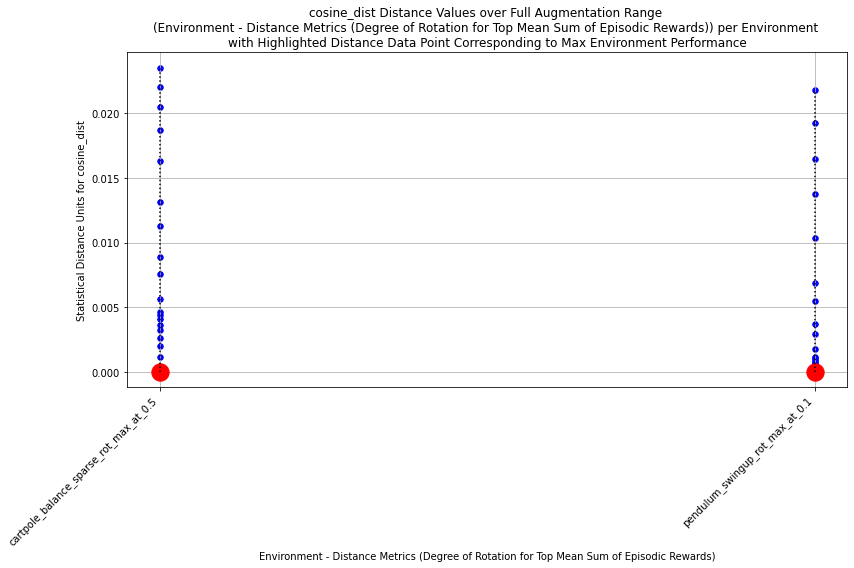

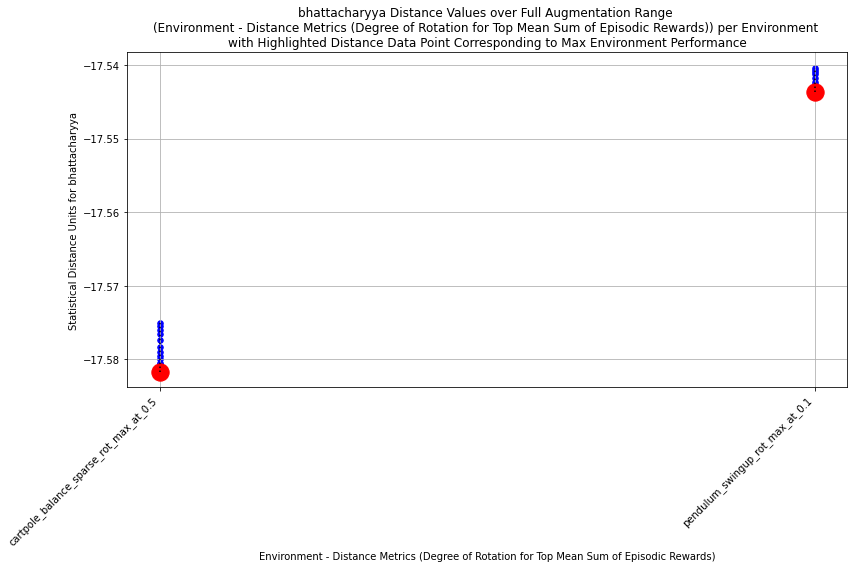

In [2]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'rot'
EXP_NAME = 'rotate'
# LIST_VALS = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5]
# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
#              1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 5, 7, 9, 11, 13, 15]   

LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]
# LIST_VALS = [0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Rotation (in degrees)'
USE_VARIANCE = False
TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}

# plot_performance = True
# plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
    'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
#     'walker_run'
]


for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)
    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)


    
XLABEL_STATS = 'Environment - Distance Metrics (Degree of Rotation for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists)

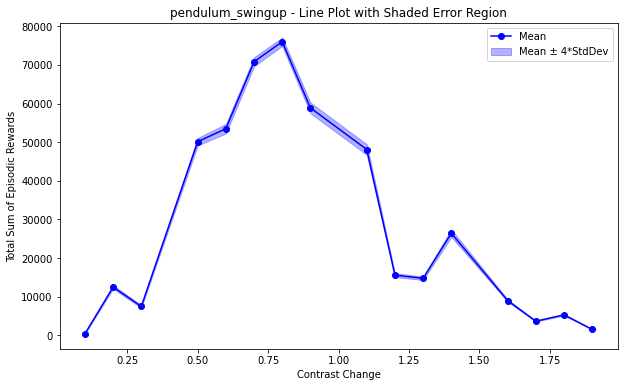

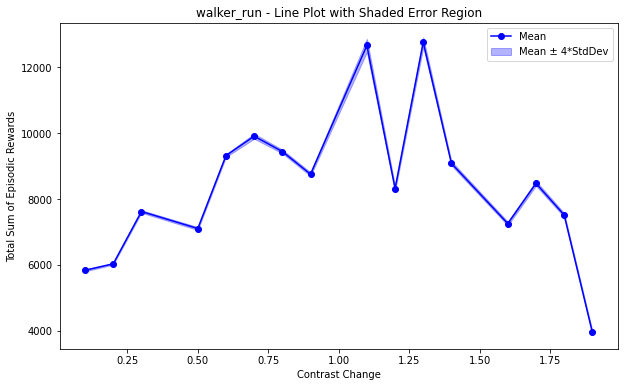

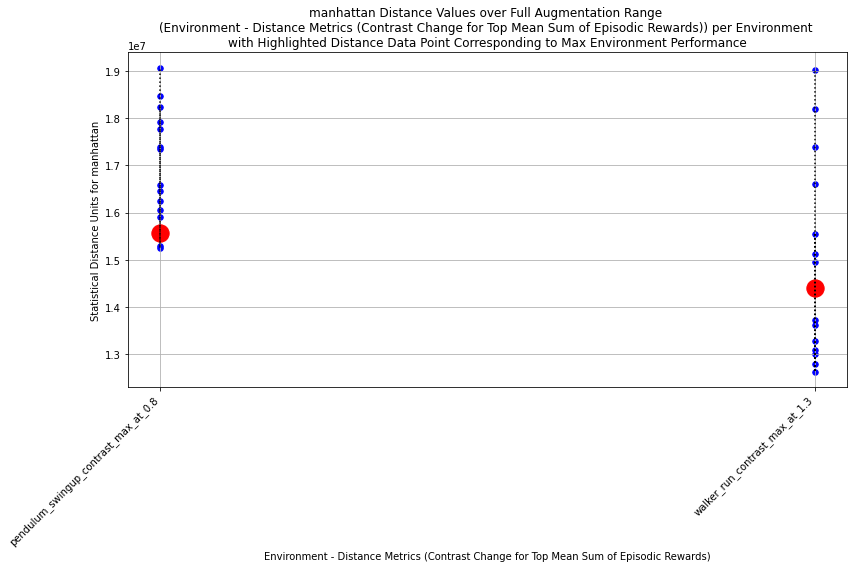

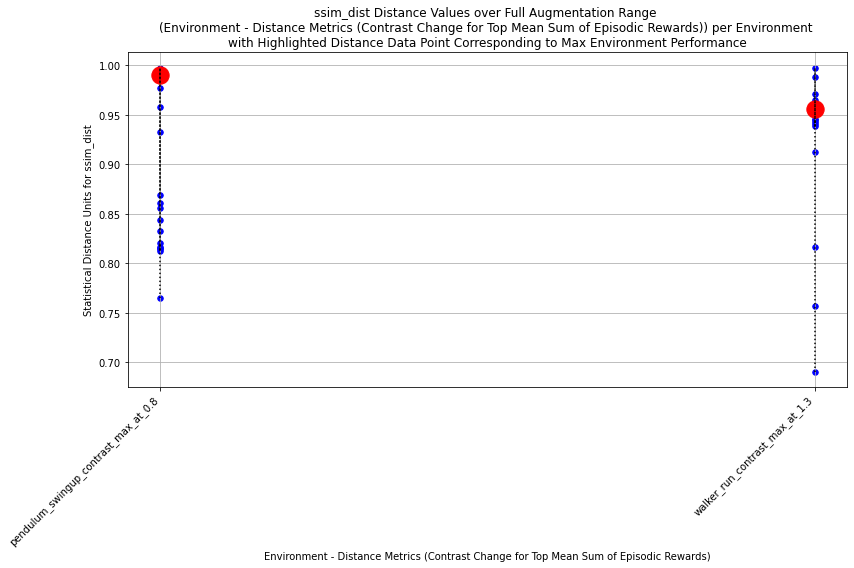

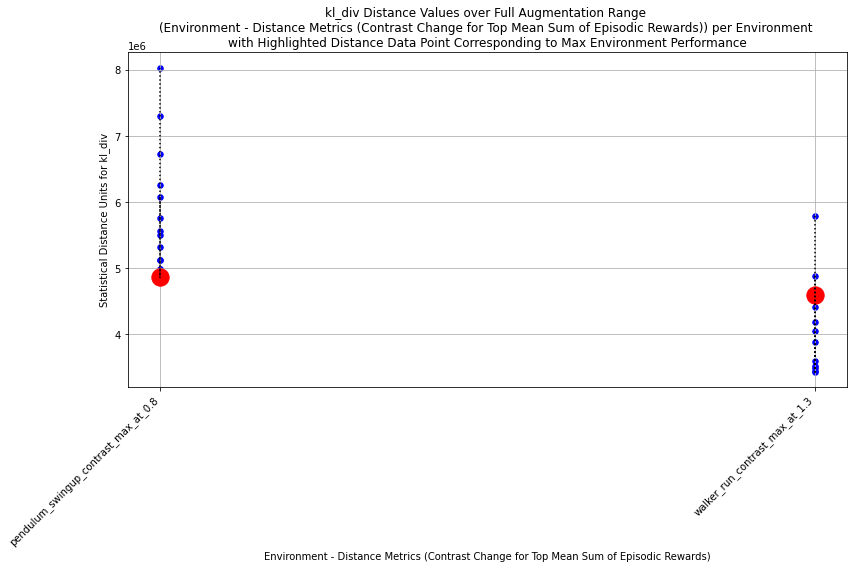

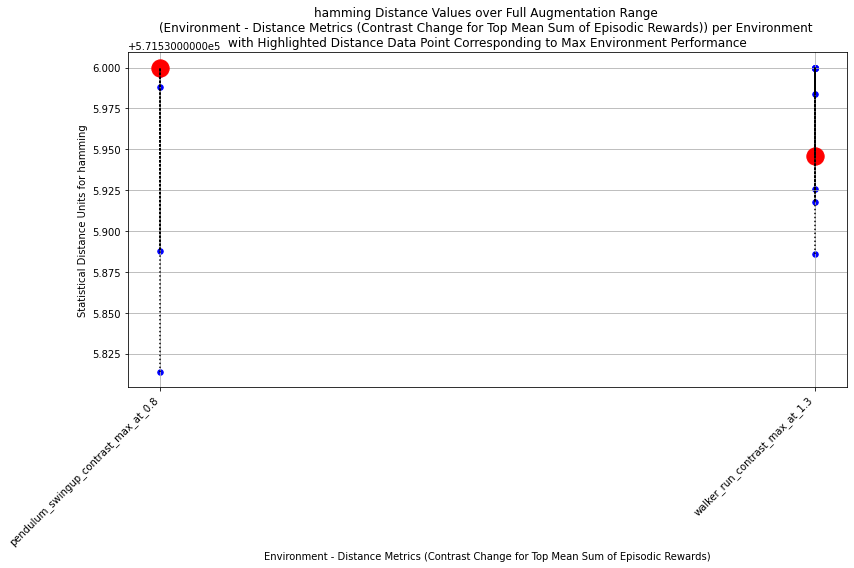

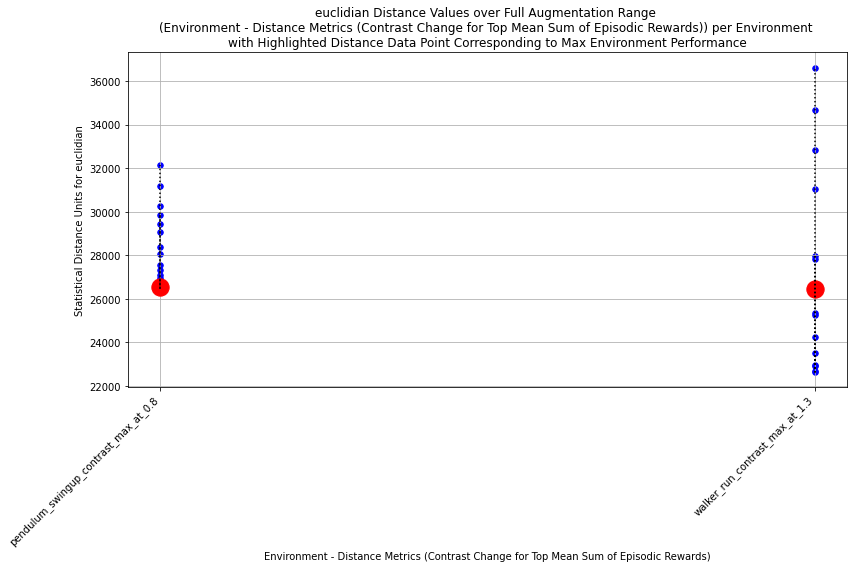

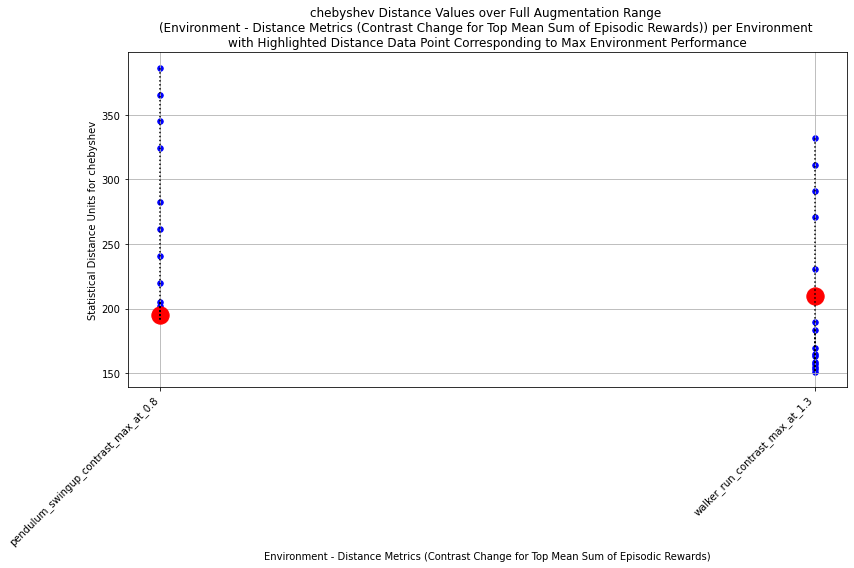

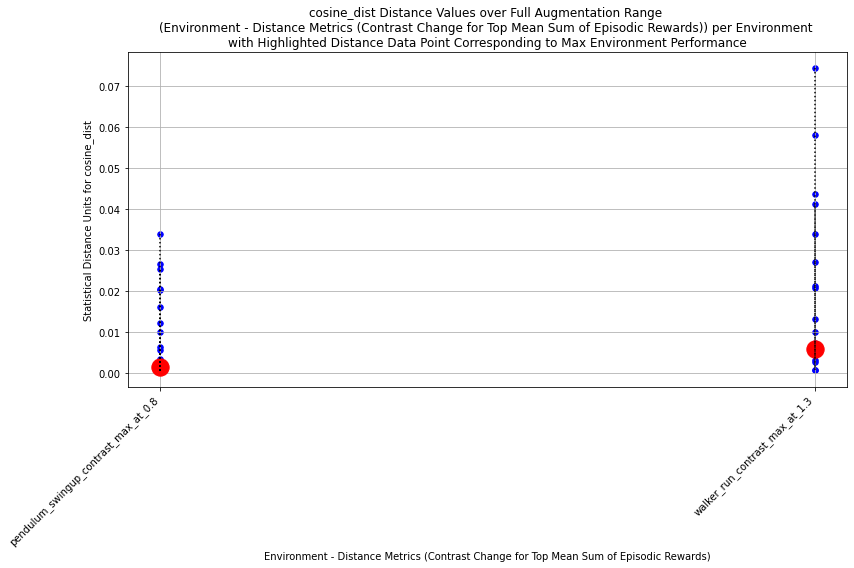

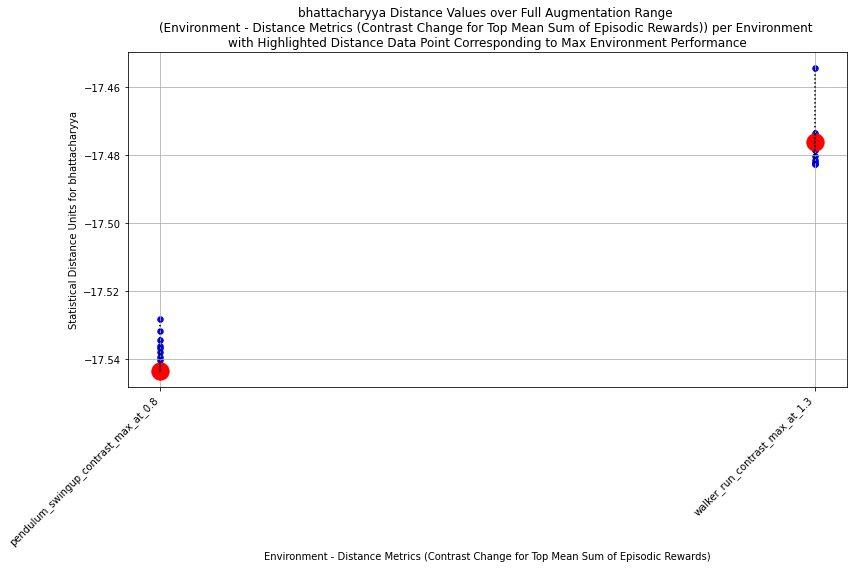

In [4]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)


EXP_TYPE = 'contrast'
EXP_NAME = 'contrast'
# LIST_VALS = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5]
# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
#              1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 5, 7, 9, 11, 13, 15]   

# LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]
# LIST_VALS = [0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 2.5, 3, 4, 5, 7, 9, 11, 13, 15]
LIST_VALS = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9]

column_name = 'episode_reward'
XLABEL_STATS_AUG = 'Contrast Change'
USE_VARIANCE = False
TIMES_STDDEV = 4
DICTS_ALL_STATS = {}
STATS_DATA = {}
MAX_INDICES = {}

# plot_performance = True
# plot_stats_dists = True


stats_column_names = [
        "manhattan",
        "ssim_dist",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

env_names = [
#     'cartpole_balance_sparse',
#     'finger_turn_hard',
    'pendulum_swingup',
#     'quadruped_run',
#     'reacher_hard',
    'walker_run'
]


for env_name in env_names:
    DICTS_ALL_STATS[env_name] = {}
    MAX_TOP_FIVE = proc.process_and_analyze_data(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, column_name, 
                                                 XLABEL_STATS_AUG, USE_VARIANCE, TIMES_STDDEV, DICTS_ALL_STATS,
                                                show=plot_performance)
    proc.process_and_generate_aug_stats(EXP_TYPE, env_name, EXP_NAME, LIST_VALS, MAX_TOP_FIVE, stats_column_names, 
                                        STATS_DATA, MAX_INDICES)


    
XLABEL_STATS = 'Environment - Distance Metrics (Contrast Change for Top Mean Sum of Episodic Rewards)'
proc.plot_statistical_distance_metrics(
    STATS_DATA, MAX_INDICES, stats_column_names, XLABEL_STATS, show=plot_stats_dists)

# Insights

* In terms of performance, the average total sum over episodic rewards indicates that each environment has a relatively narrow range of augmentation values that can yield maximum total rewards.

* For different environments, the augmentation value that maximizes total rewards varies. For instance, the CartPole environment achieves its maximum performance at a padding of 3.0 pixels, whereas the Walker-Run environment reaches its peak performance at a padding of 5.0 pixels.

* The same augmentation values affect video frames (images) from different environments differently. For example, a padding of 5.0 pixels can alter a CartPole image differently compared to a Walker-Run image.

* The same range of augmentation values (e.g., padding between 1.0 and 10.0 pixels) generates varying degrees of changes in terms of statistical distances (explain why this is the case, wat elements in the image, their presence or absence may lead to these differences in a given distance, give more details about the variance between environments, maybe there is a correlation between this and a translation degree/, I will check into this more...)

* When evaluating the statistical values that reflect the degree of modifications in images at different augmentation parameters and comparing them with the corresponding augmentation parameters that yield top performance for each environment, there appears to be a consistent interval for certain metrics. Even if the augmentation parameters differ (e.g., padding of 3.0 vs. 5.0), the statistical values for certain metrics tend to fall within a specific range.

* This correlation between the degree of change (in terms of statistical distance) and learned performance does not apply to all statistical distances tested. However, some statistical distances show promising results (we may pick one stats distance that shows best performance; we can mention that we tried others but we might want to get specific one distance and make it as recommendation, let's see once we have results for other augmentations)

* objectives to look for perfect hyperparams, to include in future works, 